# **Web Scraping & Data Handling Challenge**



### **Website:**
JustWatch -  https://www.justwatch.com/in/movies?release_year_from=2000


### **Description:**

JustWatch is a popular platform that allows users to search for movies and TV shows across multiple streaming services like Netflix, Amazon Prime, Hulu, etc. For this assignment, you will be required to scrape movie and TV show data from JustWatch using Selenium, Python, and BeautifulSoup. Extract data from HTML, not by directly calling their APIs. Then, perform data filtering and analysis using Pandas, and finally, save the results to a CSV file.

### **Tasks:**

**1. Web Scraping:**

Use BeautifulSoup to scrape the following data from JustWatch:

   **a. Movie Information:**

      - Movie title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the movie page on JustWatch

   **b. TV Show Information:**

      - TV show title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the TV show page on JustWatch

  **c. Scope:**

```
 ` - Scrape data for at least 50 movies and 50 TV shows.
   - You can choose the entry point (e.g., starting with popular movies,
     or a specific genre, etc.) to ensure a diverse dataset.`

```


**2. Data Filtering & Analysis:**

   After scraping the data, use Pandas to perform the following tasks:

   **a. Filter movies and TV shows based on specific criteria:**

   ```
      - Only include movies and TV shows released in the last 2 years (from the current date).
      - Only include movies and TV shows with an IMDb rating of 7 or higher.
```

   **b. Data Analysis:**

   ```
      - Calculate the average IMDb rating for the scraped movies and TV shows.
      - Identify the top 5 genres that have the highest number of available movies and TV shows.
      - Determine the streaming service with the most significant number of offerings.
      
   ```   

**3. Data Export:**

```
   - Dump the filtered and analysed data into a CSV file for further processing and reporting.

   - Keep the CSV file in your Drive Folder and Share the Drive link on the colab while keeping view access with anyone.
```

**Submission:**
```
- Submit a link to your Colab made for the assignment.

- The Colab should contain your Python script (.py format only) with clear
  comments explaining the scraping, filtering, and analysis process.

- Your Code shouldn't have any errors and should be executable at a one go.

- Before Conclusion, Keep your Dataset Drive Link in the Notebook.
```



**Note:**

1. Properly handle errors and exceptions during web scraping to ensure a robust script.

2. Make sure your code is well-structured, easy to understand, and follows Python best practices.

3. The assignment will be evaluated based on the correctness of the scraped data, accuracy of data filtering and analysis, and the overall quality of the Python code.








# **Start The Project**

## **Task 1:- Web Scrapping**

In [ ]:
#Installing all necessary labraries
!pip install bs4
!pip install requests

In [8]:
#import all necessary labraries
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np

## **Scrapping Movies Data**

In [9]:
def fetch_movie_urls(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        return "Failed to retrieve the page, status code:", response.status_code
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup


url = 'https://www.justwatch.com/in/movies?release_year_from=2000'
soup=fetch_movie_urls(url)
print(soup.prettify())

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

## **Fetching Movie URL's**

In [10]:
# Fetching Movie URL's
movie_links = soup.find_all('a', href=True)
movie_urls = [link['href'] for link in movie_links if '/movie/' in link['href']]

url_list=[]
for x in movie_urls:
  url_list.append('https://www.justwatch.com'+x)
print(url_list)

['https://www.justwatch.com/in/movie/bhool-bhulaiyaa-3', 'https://www.justwatch.com/in/movie/stree-2', 'https://www.justwatch.com/in/movie/deadpool-3', 'https://www.justwatch.com/in/movie/ntr-30', 'https://www.justwatch.com/in/movie/the-substance', 'https://www.justwatch.com/in/movie/kishkkindha-kandam', 'https://www.justwatch.com/in/movie/vettaiyan', 'https://www.justwatch.com/in/movie/lucky-baskhar', 'https://www.justwatch.com/in/movie/venom-3-2024', 'https://www.justwatch.com/in/movie/meiyazhagan', 'https://www.justwatch.com/in/movie/amaran-2024', 'https://www.justwatch.com/in/movie/singham-again-2024-0', 'https://www.justwatch.com/in/movie/gladiator', 'https://www.justwatch.com/in/movie/martin', 'https://www.justwatch.com/in/movie/all-we-imagine-as-light', 'https://www.justwatch.com/in/movie/bagheera-2024', 'https://www.justwatch.com/in/movie/black-2024', 'https://www.justwatch.com/in/movie/lubber-pandhu', 'https://www.justwatch.com/in/movie/alien-romulus', 'https://www.justwatch.c

## **Scrapping Movie Title**

In [11]:
# Movie title

movie_title_list=[]# List to store all movie title

# Extracting all movie titles from  tag and storing them in movie_titles
movie_titles = soup.find_all('a',class_='title-list-grid__item--link',attrs={'href':True})

# Extracting each movie title from movie_titles and storing in movie_title_list
for movie_title in movie_titles:

    # Extract the 'href' attribute value, which contains the movie title
    data_id_value = movie_title['href']

    # Removing the '/in/movie/' prefix to get the clean movie title
    data_id_value = data_id_value.replace("/in/movie/","")

    # Converting the movie title to uppercase and appending to the list
    movie_title_list.append(data_id_value.upper())
print(movie_title_list)

['BHOOL-BHULAIYAA-3', 'STREE-2', 'DEADPOOL-3', 'NTR-30', 'THE-SUBSTANCE', 'KISHKKINDHA-KANDAM', 'VETTAIYAN', 'LUCKY-BASKHAR', 'VENOM-3-2024', 'MEIYAZHAGAN', 'AMARAN-2024', 'SINGHAM-AGAIN-2024-0', 'GLADIATOR', 'MARTIN', 'ALL-WE-IMAGINE-AS-LIGHT', 'BAGHEERA-2024', 'BLACK-2024', 'LUBBER-PANDHU', 'ALIEN-ROMULUS', 'THE-WILD-ROBOT', 'AJAYANTE-RANDAM-MOSHANAM', 'DO-PATTI', 'SIDDHARTH-ROY', 'THE-BUCKINGHAM-MURDERS', 'PUSHPA', 'STRANGE-DARLING', 'GAGANACHARI', 'BHOOL-BHULAIYAA-2', 'TUMBBAD', 'KANGUVA', 'VICKY-VIDYA-KA-WOH-WALA-VIDEO', 'MY-OLD-ASS', 'VISWAM-2024', 'KILL-2024', 'FURIOSA', 'TRANSFORMERS-ONE-2024', 'KHEL-KHEL-MEIN', 'YUDHRA', 'THANGALAAN', 'KALKI-2898-AD', 'LONGLEGS', 'GOLAM', 'THALAPATHY-68', '365-DAYS', 'IT-ENDS-WITH-US', 'BHOOL-BHULAIYAA', 'A-QUIET-PLACE-DAY-ONE', 'UNTITLED-SOORARAI-POTTRU-REMAKE', 'VENOM-2018', 'MUNJHA', 'SMILE-2', 'VEDAA', 'THE-SABARMATI-REPORT', 'SALAAR', 'DESPICABLE-ME-4-2024', 'VAAZHAI', 'CADDO-LAKE', 'OLDBOY-2003', 'MANGALAVARAM', 'VIVEKANANDAN-VIRALAANU',

## **Scrapping release Year**

In [12]:
# Movie release year
movie_release_year_list = []  # List to store all movie release year

# For every movie title present in movies_title_list , Finding their release year
for movie in movie_title_list:
    # Constructing the absolute URL for fetching each movie
    absolute_url = 'https://www.justwatch.com/in/movie/' + movie

    # Sending an HTTP GET request to the URL, adding headers to mimic browser request
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
    }
    response_ry = requests.get(absolute_url, headers=headers)

    # Parsing HTML content with Beautiful Soup only if the request was successful
    if response_ry.status_code == 200:
        soup_ry = BeautifulSoup(response_ry.text, 'html.parser')

        # Check if the span element exists before accessing its text
        movie_release_year_element = soup_ry.find('span', class_='text-muted')
        if movie_release_year_element:
            movie_release_year = movie_release_year_element.text.strip()
            movie_release_year = movie_release_year.replace("(", "")
            movie_release_year = movie_release_year.replace(")", "")
            movie_release_year_list.append(movie_release_year)
        else:
            print(f"Could not find release year for movie: {movie}")
            movie_release_year_list.append("N/A")  # Append a placeholder value
    else:
        print(f"Failed to fetch page for movie: {movie}, Status Code: {response_ry.status_code}")
        movie_release_year_list.append("N/A")  # Append a placeholder value

print(movie_release_year_list)

Could not find release year for movie: BHOOL-BHULAIYAA-3
Could not find release year for movie: STREE-2
Could not find release year for movie: DEADPOOL-3
Could not find release year for movie: NTR-30
Could not find release year for movie: THE-SUBSTANCE
Could not find release year for movie: KISHKKINDHA-KANDAM
Could not find release year for movie: VETTAIYAN
Could not find release year for movie: LUCKY-BASKHAR
Could not find release year for movie: VENOM-3-2024
Could not find release year for movie: MEIYAZHAGAN
Could not find release year for movie: AMARAN-2024
Could not find release year for movie: SINGHAM-AGAIN-2024-0
Could not find release year for movie: GLADIATOR
Could not find release year for movie: MARTIN
Could not find release year for movie: ALL-WE-IMAGINE-AS-LIGHT
Could not find release year for movie: BAGHEERA-2024
Could not find release year for movie: BLACK-2024
Could not find release year for movie: LUBBER-PANDHU
Could not find release year for movie: ALIEN-ROMULUS
Could 

## **Scrapping Genres**

In [13]:
# Movie genre

movie_genre_list = []# List to store all movie genre

# For every movie title present in movies_title_list , Finding their genre
for movie in movie_title_list:

    # Constructing the absolute URL for fetching each movie
    absolute_url = 'https://www.justwatch.com/in/movie/' + movie
    response_g = requests.get(absolute_url)
    soup = BeautifulSoup(response_g.text,'html.parser')

    # Selecting only those h3 whose heading is genres
    h3_element = soup.find('h3', class_='detail-infos__subheading', string='Genres')

    if h3_element:
        # Check if the next sibling is a div with class "detail-infos__value"
        div_element = h3_element.find_next_sibling('div', class_='detail-infos__value')

        if div_element:
            movie_genre_list.append(div_element.text.strip())
        else:
            movie_genre_list.append("Genre Not Listed")
    else:
         movie_genre_list.append("Genre Not Listed")
print(movie_genre_list)

['Comedy, Horror', 'Comedy, Horror', 'Comedy, Science-Fiction, Action & Adventure', 'Mystery & Thriller, Action & Adventure, Drama', 'Science-Fiction, Drama, Horror', 'Drama, Mystery & Thriller', 'Action & Adventure, Crime, Drama', 'Crime, Drama, Mystery & Thriller', 'Science-Fiction, Action & Adventure, Mystery & Thriller', 'Kids & Family, Drama', 'Action & Adventure, Drama, War & Military', 'Action & Adventure, Drama', 'Action & Adventure, Drama', 'Mystery & Thriller, Action & Adventure, Drama', 'Drama, Romance', 'Action & Adventure', 'Mystery & Thriller, Horror, Science-Fiction', 'Sport, Comedy, Drama, Kids & Family, Romance', 'Horror, Science-Fiction, Mystery & Thriller', 'Science-Fiction, Animation, Kids & Family', 'Drama, Action & Adventure, Comedy', 'Drama, Mystery & Thriller, Crime', 'Drama, Romance', 'Mystery & Thriller, Crime, Drama', 'Action & Adventure, Drama, Mystery & Thriller, Crime', 'Horror, Mystery & Thriller', 'Science-Fiction, Comedy, Fantasy', 'Horror, Comedy', 'Fa

## **Scrapping IMBD Rating**

In [14]:
# Movie Imdb Rating

movie_imdb_list = []# List to store all movie imdb rating

# For every movie title present in movies_title_list , Finding their Imdb Rating
for movie in movie_title_list:

    # Constructing the absolute URL for fetching each movie
    absolute_url = 'https://www.justwatch.com/in/movie/' + movie
    response_g = requests.get(absolute_url)
    soup = BeautifulSoup(response_g.text, 'html.parser')

    # Selecting only those h3 whose heading is Rating
    h3_element = soup.find('h3', class_='detail-infos__subheading', string='Rating')

    if h3_element:
        # Check if the next sibling is a div with class "detail-infos__value"
        div_element = h3_element.find_next_sibling('div', class_='detail-infos__value')

        if div_element:
            inside_div = div_element.find_all('div', class_='jw-scoring-listing__rating')

            # Check if inside_div is non-empty
            if inside_div:
                inside_div_last = inside_div[-1] # extracting last div of inside div as last div elemnt contains span (in which last span contains rating)

                # Check if inside_div_last is non-empty
                if inside_div_last:
                    span_all = inside_div_last.find_all('span')

                    # Check if span_all is non-empty
                    if span_all:
                        span_last = span_all[-1] # Here we are extracting rating from the last span(span_last) inside last div(inside_div_last) of main div_element(div_element)
                        movie_imdb_list.append(span_last.text.strip())
                    else:
                        movie_imdb_list.append("Imdb Rating Not Listed.")
                else:
                    movie_imdb_list.append("Imdb Rating Not Listed.")
            else:
                movie_imdb_list.append("Imdb Rating Not Listed.")
        else:
            movie_imdb_list.append("Imdb Rating Not Listed.")
    else:
        movie_imdb_list.append("Imdb Rating Not Listed.")
print(movie_imdb_list)

['Imdb Rating Not Listed.', '62%', '79%', '33%', '90%', 'Imdb Rating Not Listed.', 'Imdb Rating Not Listed.', 'Imdb Rating Not Listed.', 'Imdb Rating Not Listed.', 'Imdb Rating Not Listed.', 'Imdb Rating Not Listed.', 'Imdb Rating Not Listed.', '80%', 'Imdb Rating Not Listed.', 'Imdb Rating Not Listed.', 'Imdb Rating Not Listed.', 'Imdb Rating Not Listed.', 'Imdb Rating Not Listed.', '80%', 'Imdb Rating Not Listed.', 'Imdb Rating Not Listed.', 'Imdb Rating Not Listed.', 'Imdb Rating Not Listed.', '79%', 'Imdb Rating Not Listed.', '95%', 'Imdb Rating Not Listed.', '63%', 'Imdb Rating Not Listed.', 'Imdb Rating Not Listed.', 'Imdb Rating Not Listed.', '90%', 'Imdb Rating Not Listed.', '89%', '90%', 'Imdb Rating Not Listed.', '78%', 'Imdb Rating Not Listed.', 'Imdb Rating Not Listed.', '77%', '86%', 'Imdb Rating Not Listed.', '40%', 'Imdb Rating Not Listed.', '56%', '33%', 'Imdb Rating Not Listed.', '42%', '30%', '56%', 'Imdb Rating Not Listed.', '44%', 'Imdb Rating Not Listed.', '73%', '

## **Scrapping Runtime/Duration**

In [15]:
# Movie Runtime/Duration

movie_runtime_list=[]# List to store all movie runtime/duration

# For every movie title present in movies_title_list , Finding their Runtime/Duration
for movie in movie_title_list:

    # Constructing the absolute URL for fetching each movie
    absolute_url = 'https://www.justwatch.com/in/movie/' + movie
    response_g = requests.get(absolute_url)
    soup = BeautifulSoup(response_g.text,'html.parser')

    # Selecting only those h3 whose heading is runtine
    h3_element = soup.find('h3', class_='detail-infos__subheading', string='Runtime')

    if h3_element:
        # Check if the next sibling is a div with class "detail-infos__value"
        div_element = h3_element.find_next_sibling('div', class_='detail-infos__value')

        if div_element:
            movie_runtime_list.append(div_element.text.strip())
        else:
            movie_runtime_list.append("No Runtime/Duration mentioned")
    else:
      movie_runtime_list.append("No Runtime/Duration mentioned")
print(movie_runtime_list)

['2h 38min', '2h 27min', '2h 8min', '2h 56min', '2h 21min', '2h 13min', '2h 43min', '2h 50min', '1h 49min', '2h 57min', '2h 47min', '2h 24min', '2h 35min', '2h 27min', '1h 58min', '2h 38min', '2h 30min', '2h 26min', '1h 59min', '1h 42min', '2h 27min', '2h 8min', '2h 28min', '1h 47min', '2h 59min', '1h 37min', '1h 54min', '2h 23min', '1h 44min', '2h 34min', '2h 32min', '1h 29min', '2h 33min', '1h 45min', '2h 29min', '1h 44min', '2h 15min', '2h 22min', '2h 36min', '3h 0min', '1h 41min', '2h 0min', '3h 3min', '1h 54min', '2h 10min', '2h 38min', '1h 39min', '2h 35min', '1h 52min', '2h 3min', '2h 7min', '2h 25min', '2h 7min', '2h 55min', '1h 34min', '2h 14min', '1h 43min', '2h 0min', '2h 29min', '2h 1min', '2h 12min', '1h 57min', '2h 19min', '3h 21min', '2h 4min', '2h 28min', '2h 35min', '2h 36min', '3h 21min', '2h 36min', '2h 7min', '2h 8min', '2h 39min', '1h 46min', '2h 52min', '2h 7min', '1h 49min', '2h 47min', '1h 39min', '1h 37min', '1h 56min', '3h 0min', '1h 50min', '2h 30min', '1h 46

## **Scrapping Age Rating**

In [16]:
# Movie Age Rating

movie_age_rating_list = []# List to store all movie age rating

# For every movie title present in movies_title_list , Finding their Age Rating
for movie in movie_title_list:

    # Constructing the absolute URL for fetching each movie
    absolute_url = 'https://www.justwatch.com/in/movie/' + movie
    response_g = requests.get(absolute_url)
    soup = BeautifulSoup(response_g.text,'html.parser')

    # Selecting only those h3 whose heading is Age rating
    h3_element = soup.find('h3', class_='detail-infos__subheading', string='Age rating')

    if h3_element:
        # Check if the next sibling is a div with class "detail-infos__value"
        div_element = h3_element.find_next_sibling('div', class_='detail-infos__value')

        if div_element:
            movie_age_rating_list.append(div_element.text.strip())
        else:
            movie_age_rating_list.append("Age Rating Not Listed.")
    else:
         movie_age_rating_list.append("Age Rating Not Listed.")
print(movie_age_rating_list)

['UA', 'UA', 'A', 'UA', 'Age Rating Not Listed.', 'UA', 'UA', 'UA', 'Age Rating Not Listed.', 'U', 'Age Rating Not Listed.', 'UA', 'Age Rating Not Listed.', 'UA', 'A', 'UA', 'UA', 'U', 'A', 'Age Rating Not Listed.', 'UA', 'Age Rating Not Listed.', 'A', 'A', 'UA', 'Age Rating Not Listed.', 'Age Rating Not Listed.', 'UA', 'A', 'UA', 'UA', 'Age Rating Not Listed.', 'UA', 'A', 'A', 'U', 'UA', 'UA', 'UA', 'UA', 'A', 'UA', 'UA', 'Age Rating Not Listed.', 'A', 'Age Rating Not Listed.', 'Age Rating Not Listed.', 'U', 'UA', 'UA', 'Age Rating Not Listed.', 'Age Rating Not Listed.', 'UA', 'A', 'U', 'U', 'A', 'A', 'Age Rating Not Listed.', 'UA', 'Age Rating Not Listed.', 'Age Rating Not Listed.', 'UA', 'A', 'Age Rating Not Listed.', 'Age Rating Not Listed.', 'Age Rating Not Listed.', 'U', 'UA', 'UA', 'Age Rating Not Listed.', 'UA', 'U', 'U', 'UA', 'Age Rating Not Listed.', 'Age Rating Not Listed.', 'UA', 'A', 'Age Rating Not Listed.', 'UA', 'A', 'Age Rating Not Listed.', 'Age Rating Not Listed.', 

## **Fetching Production Countries Details**

In [17]:
# Movie Production Country

movie_production_country_list=[]# List to store all movie production country

# For every movie title present in movies_title_list , Finding their Production country
for movie in movie_title_list:

    # Constructing the absolute URL for fetching each movie
    absolute_url = 'https://www.justwatch.com/in/movie/' + movie
    response = requests.get(absolute_url)
    soup = BeautifulSoup(response.text,'html.parser')

    # Selecting only those h3 whose sub-heading inside details- infos is 'Production Country'
    h3_element = soup.find('h3', class_='detail-infos__subheading', string=' Production country ')

    if h3_element:
        # Check if the next sibling is a div with class "detail-infos__value"
        div_element = h3_element.find_next_sibling('div', class_='detail-infos__value')

        if div_element:
            movie_production_country_list.append(div_element.text.strip())
        else:
            movie_production_country_list.append("Production Country Not Listed")
    else:
       movie_production_country_list.append("Production Country Not Listed")
print(movie_production_country_list)

['India', 'India', 'United States', 'India', 'France, United Kingdom', 'India', 'India', 'India', 'United States', 'India', 'India', 'India', 'United Kingdom, United States', 'India', 'France, India, Italy, Luxembourg, Netherlands', 'India', 'India', 'India', 'Canada, United Kingdom, United States, Hungary, Australia, New Zealand', 'United States, Japan', 'India', 'India', 'India', 'India, United Kingdom', 'India', 'United States', 'India', 'India', 'Sweden, India', 'India', 'India', 'Canada, United States, United Kingdom', 'India', 'India', 'Australia, United States', 'United States', 'India', 'India', 'India', 'India', 'United States, Canada', 'India', 'India', 'Poland', 'United States', 'India', 'United States, United Kingdom, Canada', 'India', 'China, United States', 'India', 'United States', 'India', 'India', 'India', 'United States', 'India', 'United States', 'South Korea', 'India', 'India', 'India', 'Spain', 'India', 'India', 'United States', 'United States, United Kingdom, Moro

## **Fetching Streaming Service Details**

In [18]:
# Movie Streaming Service Platform

movie_streaming_list=[]# List to store all movie streaming platform

# For every movie title present in movies_title_list , Finding their Streaming Platform
for movie in movie_title_list:

    # Constructing the absolute URL for fetching each movie
    absolute_url = 'https://www.justwatch.com/in/movie/' + movie
    response = requests.get(absolute_url)
    soup = BeautifulSoup(response.text,'html.parser')

    # Finding the outer div element with the class "buybox-row stream"
    outer_div = soup.find('div', class_='buybox-row stream')

    if outer_div:
        # Finding the nested div with class "buybox-row__offers" inside the outer div
        inner_div = outer_div.find('div', class_='buybox-row__offers')

        if inner_div:
            # Find the picture element within the nested div
            picture_element = inner_div.find('picture')

            if picture_element:
                # Extract the alt attribute from the img element inside the picture which contains streaming platform name
                img_element = picture_element.find('img')
                if img_element:
                    alt_text = img_element['alt']
                    movie_streaming_list.append(alt_text)
                else:
                    movie_streaming_list.append("Not Available for Streaming.")
            else:
                movie_streaming_list.append("Not Available for Streaming.")
        else:
            movie_streaming_list.append("Not Available for Streaming.")
    else:
        movie_streaming_list.append("Not Available for Streaming.")
print(movie_streaming_list)

['Not Available for Streaming.', 'Not Available for Streaming.', 'Not Available for Streaming.', 'Not Available for Streaming.', 'Not Available for Streaming.', 'Not Available for Streaming.', 'Not Available for Streaming.', 'Not Available for Streaming.', 'Not Available for Streaming.', 'Not Available for Streaming.', 'Not Available for Streaming.', 'Not Available for Streaming.', 'Not Available for Streaming.', 'Not Available for Streaming.', 'Not Available for Streaming.', 'Not Available for Streaming.', 'Not Available for Streaming.', 'Not Available for Streaming.', 'Not Available for Streaming.', 'Not Available for Streaming.', 'Not Available for Streaming.', 'Not Available for Streaming.', 'Not Available for Streaming.', 'Not Available for Streaming.', 'Not Available for Streaming.', 'Not Available for Streaming.', 'Not Available for Streaming.', 'Not Available for Streaming.', 'Not Available for Streaming.', 'Not Available for Streaming.', 'Not Available for Streaming.', 'Not Av

## **Now Creating Movies DataFrame**

In [19]:
# Creating Movies Dataframe
# Assuming movie_title_list contains the names of the movies
movie_url_list = ['https://www.justwatch.com/in/movie/' + movie for movie in movie_title_list]  # Create a list of URLs based on movie_title_list

data_movies = {
    'Movie Title':movie_title_list,
    'IMDB Rating':movie_imdb_list,
    'Release Year':movie_release_year_list,
    'Genre':movie_genre_list,
    'Runtime/Duration':movie_runtime_list,
    'Age Rating':movie_age_rating_list,
    'Production Country':movie_production_country_list,
    'Streaming Platform':movie_streaming_list,
    'Url':movie_url_list
}

df_movies = pd.DataFrame(data_movies)

In [20]:
df_movies.head(2)

,Movie Title,IMDB Rating,Release Year,Genre,Runtime/Duration,Age Rating,Production Country,Streaming Platform,Url
0,BHOOL-BHULAIYAA-3,Imdb Rating Not Listed.,N/A,"Comedy, Horror",2h 38min,UA,India,Not Available for Streaming.,https://www.justwatch.com/in/movie/BHOOL-BHULA...
1,STREE-2,62%,N/A,"Comedy, Horror",2h 27min,UA,India,Not Available for Streaming.,https://www.justwatch.com/in/movie/STREE-2


## **Scraping TV  Show Data**

In [ ]:
!pip install selenium==4.10.0
!apt-get update
!apt install chromium-chromedriver

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 58.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.7/481.7 kB 24.6 MB/s eta 0:00:00
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,621 kB]
Get:8 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,454 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy I

In [ ]:
with open('output.html', 'w') as file:
    file.write(soup.prettify())

In [ ]:
from IPython.display import display, HTML
display(HTML(soup.prettify()))

In [21]:
# Scraping TV Show Data
def fetch_movie_urls(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        return "Failed to retrieve the page, status code:", response.status_code
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup


url = 'https://www.justwatch.com/in/tv-shows?release_yeara_from=2000'
soup=fetch_movie_urls(url)
print(soup.prettify())


<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

## **Fetching Tv shows Url details**

In [22]:
# Fetching TV Show URL's
tv_show_url_link = soup.find_all('a', href=True)
tv_show_urls = [link['href'] for link in tv_show_url_link if '/tv-show/' in link['href']]

tv_show_url_list=[]
for x in tv_show_urls:
  tv_show_url_list.append('https://www.justwatch.com'+x)
print(tv_show_url_list)

['https://www.justwatch.comhttps://www.justwatch.com/in/tv-show/friends', 'https://www.justwatch.comhttps://www.justwatch.com/in/tv-show/the-office', 'https://www.justwatch.comhttps://www.justwatch.com/in/tv-show/mirzapur', 'https://www.justwatch.comhttps://www.justwatch.com/in/tv-show/sacred-games', 'https://www.justwatch.comhttps://www.justwatch.com/in/tv-show/asur', 'https://www.justwatch.comhttps://www.justwatch.com/in/tv-show/farzi', 'https://www.justwatch.comhttps://www.justwatch.com/in/tv-show/anupamaa', 'https://www.justwatch.comhttps://www.justwatch.com/in/tv-show/sarabhai-vs-sarabhai', 'https://www.justwatch.comhttps://www.justwatch.com/in/tv-show/bigg-boss', 'https://www.justwatch.comhttps://www.justwatch.com/in/tv-show/bigg-boss', 'https://www.justwatch.comhttps://www.justwatch.com/in/tv-show/bambai-meri-jaan', 'https://www.justwatch.comhttps://www.justwatch.com/in/tv-show/mismatched', 'https://www.justwatch.com/in/tv-show/from', 'https://www.justwatch.com/in/tv-show/the-pe

## **Fetching Tv Show Title details**

In [23]:
# TV Shows title

tv_show_title_list=[]# List to store all TV Show title

# Extracting all TV Show titles from  tag and storing them in tv_show_titles
tv_show_titles = soup.find_all('a',class_='title-list-grid__item--link',attrs={'href':True})

# Extracting each tv_show_title from tv_show_titles and storing in tv_show_title_list
for tv_show_title in tv_show_titles:

    # Extract the 'href' attribute value, which contains the tv show title
    data_id_value = tv_show_title['href']


    data_id_value = data_id_value.replace("/in/tv-show/","")

    # Converting the tv show title to uppercase and appending to the list
    tv_show_title_list.append(data_id_value.upper())
print(tv_show_title_list)

['FROM', 'THE-PENGUIN', 'CITADEL-HONEY-BUNNY', 'THE-DAY-OF-THE-JACKAL', 'DONT-COME-HOME', 'MIRZAPUR', 'TAAZA-KHABAR', 'DUNE-THE-SISTERHOOD', 'BIGG-BOSS', 'ARCANE', 'X-X-X-UNCENSORED', 'THE-DIPLOMAT', 'THE-PRADEEPS-OF-PITTSBURGH', 'AGATHA-HOUSE-OF-HARKNESS', 'GAME-OF-THRONES', 'THESE-BLACK-BLACK-EYES', 'YELLOWSTONE', 'SAY-NOTHING', 'SILO', 'MASTRAM', 'TULSA-KING', 'PANCHAYAT', 'MURDER-MINDFULLY', 'DAN-DA-DAN', 'SWEETPEA', 'THUKRA-KE-MERA-PYAAR', 'FRIENDS', 'THE-ROOKIE', 'BREAKING-BAD', 'UNTITLED-KAPIL-SHARMA-NETFLIX-PROJECT', '1000-BABIES', 'THE-LEGEND-OF-HANUMAN', 'TEACUP', 'MITHYA', 'HELLBOUND', 'CAMPUS-BEATS', 'CRUEL-INTENTIONS', 'CROSS', 'APHARAN', 'GANDII-BAAT']


## **Fetching Release Year**

In [24]:
# TV Show release year
tv_show_release_year_list = []  # List to store all tv show release year

# For every tv show title present in tv_show_title_list , Finding their release year
for tv_show in tv_show_title_list:
    # Constructing the absolute URL for fetching each movie
    absolute_url = 'https://www.justwatch.com/in/tv-show/' + tv_show

    # Sending an HTTP GET request to the URL, adding headers to mimic browser request
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
    }
    response_ry = requests.get(absolute_url, headers=headers)

    # Parsing HTML content with Beautiful Soup only if the request was successful
    if response_ry.status_code == 200:
        soup_ry = BeautifulSoup(response_ry.text, 'html.parser')

        # Check if the span element exists before accessing its text
        tv_show_release_year_element = soup_ry.find('span', class_='text-muted')
        if tv_show_release_year_element:
            tv_show_release_year = tv_show_release_year_element.text.strip()
            tv_show_release_year = tv_show_release_year.replace("(", "")
            tv_show_release_year = tv_show_release_year.replace(")", "")
            tv_show_release_year_list.append(tv_show_release_year)
        else:
            print(f"Could not find release year for tv show: {tv_show}")
            tv_show_release_year_list.append("N/A")  # Append a placeholder value
    else:
        print(f"Failed to fetch page for tv show: {tv_show}, Status Code: {response_ry.status_code}")
        tv_show_release_year_list.append("N/A")  # Append a placeholder value

print(tv_show_release_year_list)

Could not find release year for tv show: FROM
Could not find release year for tv show: THE-PENGUIN
Could not find release year for tv show: CITADEL-HONEY-BUNNY
Could not find release year for tv show: THE-DAY-OF-THE-JACKAL
Could not find release year for tv show: DONT-COME-HOME
Could not find release year for tv show: MIRZAPUR
Could not find release year for tv show: TAAZA-KHABAR
Could not find release year for tv show: DUNE-THE-SISTERHOOD
Could not find release year for tv show: BIGG-BOSS
Could not find release year for tv show: ARCANE
Could not find release year for tv show: X-X-X-UNCENSORED
Could not find release year for tv show: THE-DIPLOMAT
Could not find release year for tv show: THE-PRADEEPS-OF-PITTSBURGH
Could not find release year for tv show: AGATHA-HOUSE-OF-HARKNESS
Could not find release year for tv show: GAME-OF-THRONES
Could not find release year for tv show: THESE-BLACK-BLACK-EYES
Could not find release year for tv show: YELLOWSTONE
Could not find release year for tv sh

## **Fetching TV Show Genre Details**

In [25]:
# TV Show genre

tv_show_genre_list = []# List to store all movie genre

# For every tv show title present in tv_show_title_list , Finding their genre
for tv_show in tv_show_title_list:

    # Constructing the absolute URL for fetching each tv show
    absolute_url = 'https://www.justwatch.com/in/tv-show/' + tv_show
    response_g = requests.get(absolute_url)
    soup = BeautifulSoup(response_g.text,'html.parser')

    # Selecting only those h3 whose heading is genres
    h3_element = soup.find('h3', class_='detail-infos__subheading', string='Genres')

    if h3_element:
        # Check if the next sibling is a div with class "detail-infos__value"
        div_element = h3_element.find_next_sibling('div', class_='detail-infos__value')

        if div_element:
            tv_show_genre_list.append(div_element.text.strip())
        else:
            tv_show_genre_list.append("Genre Not Listed")
    else:
         tv_show_genre_list.append("Genre Not Listed")
print(tv_show_genre_list)

['Mystery & Thriller, Drama, Horror, Science-Fiction', 'Crime, Drama, Fantasy', 'Science-Fiction, Mystery & Thriller, Action & Adventure, Drama', 'Crime, Drama, Mystery & Thriller, Action & Adventure', 'Mystery & Thriller, Science-Fiction, Drama, Horror', 'Action & Adventure, Drama, Mystery & Thriller, Crime', 'Drama, Science-Fiction, Action & Adventure, Comedy, Fantasy, Mystery & Thriller', 'Drama, Science-Fiction, Action & Adventure', 'Reality TV, Kids & Family', 'Animation, Action & Adventure, Drama, Fantasy, Science-Fiction, Mystery & Thriller', 'Comedy, Drama, Romance', 'Drama, War & Military, Mystery & Thriller', 'Comedy, Drama', 'Science-Fiction, Mystery & Thriller, Action & Adventure, Comedy, Drama, Fantasy', 'Drama, Action & Adventure, Science-Fiction, Fantasy', 'Mystery & Thriller, Comedy, Crime, Drama', 'Western, Drama', 'Crime, Drama, History, Mystery & Thriller', 'Drama, Science-Fiction', 'Comedy, Drama, Fantasy', 'Drama, Crime', 'Drama, Comedy', 'Comedy, Crime, Mystery & 

## **Fetching IMDB Rating Details**

In [26]:
# TV Show Imdb Rating

tv_show_imdb_list = []# List to store all tv show imdb rating

# For every tv show title present in tv_show_title_list , Finding their Imdb Rating
for tv_show in tv_show_title_list:

    # Constructing the absolute URL for fetching each tv show
    absolute_url = 'https://www.justwatch.com/in/tv-show/' + tv_show
    response_g = requests.get(absolute_url)
    soup = BeautifulSoup(response_g.text, 'html.parser')

    # Selecting only those h3 whose heading is Rating
    h3_element = soup.find('h3', class_='detail-infos__subheading', string='Rating')

    if h3_element:
        # Check if the next sibling is a div with class "detail-infos__value"
        div_element = h3_element.find_next_sibling('div', class_='detail-infos__value')

        if div_element:
            inside_div = div_element.find_all('div', class_='jw-scoring-listing__rating')

            # Check if inside_div is non-empty
            if inside_div:
                inside_div_last = inside_div[-1] # extracting last div of inside div as last div elemnt contains span

                # Check if inside_div_last is non-empty
                if inside_div_last:
                    span_all = inside_div_last.find_all('span')

                    # Check if span_all is non-empty
                    if span_all:
                        span_last = span_all[-1] # Here we are extracting rating from the last span(span_last) inside last div(inside_div_last) of main div_element(div_element)
                        tv_show_imdb_list.append(span_last.text.strip())
                    else:
                        tv_show_imdb_list.append("Imdb Rating Not Listed.")
                else:
                    tv_show_imdb_list.append("Imdb Rating Not Listed.")
            else:
                tv_show_imdb_list.append("Imdb Rating Not Listed.")
        else:
            tv_show_imdb_list.append("Imdb Rating Not Listed.")
    else:
        tv_show_imdb_list.append("Imdb Rating Not Listed.")
print(tv_show_imdb_list)

['96%', '95%', '80%', '85%', 'Imdb Rating Not Listed.', 'Imdb Rating Not Listed.', 'Imdb Rating Not Listed.', '68%', 'Imdb Rating Not Listed.', '100%', 'Imdb Rating Not Listed.', '89%', '75%', '84%', '89%', '40%', '84%', '93%', '92%', 'Imdb Rating Not Listed.', '89%', 'Imdb Rating Not Listed.', 'Imdb Rating Not Listed.', '100%', '86%', 'Imdb Rating Not Listed.', '78%', 'Imdb Rating Not Listed.', '96%', 'Imdb Rating Not Listed.', 'Imdb Rating Not Listed.', 'Imdb Rating Not Listed.', '77%', 'Imdb Rating Not Listed.', '97%', 'Imdb Rating Not Listed.', '38%', '77%', 'Imdb Rating Not Listed.', 'Imdb Rating Not Listed.']


## **Fetching Age Rating Details**

In [27]:
# TV Show Age Rating

tv_show_age_rating_list = []# List to store all tv show age rating

# For every tv_show title present in tv_show_title_list , Finding their Age Rating
for tv_show in tv_show_title_list:

    # Constructing the absolute URL for fetching each tv-show
    absolute_url = 'https://www.justwatch.com/in/tv-show/' + tv_show
    response_g = requests.get(absolute_url)
    soup = BeautifulSoup(response_g.text,'html.parser')

    # Selecting only those h3 whose heading is Age rating
    h3_element = soup.find('h3', class_='detail-infos__subheading', string='Age rating')

    if h3_element:
        # Check if the next sibling is a div with class "detail-infos__value"
        div_element = h3_element.find_next_sibling('div', class_='detail-infos__value')

        if div_element:
            tv_show_age_rating_list.append(div_element.text.strip())
        else:
            tv_show_age_rating_list.append("Age Rating Not Listed.")
    else:
         tv_show_age_rating_list.append("Age Rating Not Listed.")
print(tv_show_age_rating_list)

['Age Rating Not Listed.', 'Age Rating Not Listed.', 'Age Rating Not Listed.', 'Age Rating Not Listed.', 'Age Rating Not Listed.', 'A', 'Age Rating Not Listed.', 'Age Rating Not Listed.', 'Age Rating Not Listed.', 'Age Rating Not Listed.', 'Age Rating Not Listed.', 'A', 'Age Rating Not Listed.', 'Age Rating Not Listed.', 'U', 'Age Rating Not Listed.', 'Age Rating Not Listed.', 'Age Rating Not Listed.', 'A', 'Age Rating Not Listed.', 'Age Rating Not Listed.', 'Age Rating Not Listed.', 'A', 'Age Rating Not Listed.', 'Age Rating Not Listed.', 'Age Rating Not Listed.', 'UA', 'Age Rating Not Listed.', 'A', 'Age Rating Not Listed.', 'A', 'Age Rating Not Listed.', 'Age Rating Not Listed.', 'Age Rating Not Listed.', 'Age Rating Not Listed.', 'Age Rating Not Listed.', 'Age Rating Not Listed.', 'Age Rating Not Listed.', 'Age Rating Not Listed.', 'A']


## **Fetching Production Country details**

In [28]:
# TV Show Production Country

tv_show_production_country_list=[]# List to store all tv-show production country

# For every tv_show title present in tv_show_title_list , Finding their Production country
for tv_show in tv_show_title_list:

    # Constructing the absolute URL for fetching each tv-show
    absolute_url = 'https://www.justwatch.com/in/tv-show/' + tv_show
    response = requests.get(absolute_url)
    soup = BeautifulSoup(response.text,'html.parser')

    # Selecting only those h3 whose sub-heading inside details- infos is 'Production Country'
    h3_element = soup.find('h3', class_='detail-infos__subheading', string=' Production country ')

    if h3_element:
        # Check if the next sibling is a div with class "detail-infos__value"
        div_element = h3_element.find_next_sibling('div', class_='detail-infos__value')

        if div_element:
            tv_show_production_country_list.append(div_element.text.strip())
        else:
            tv_show_production_country_list.append("Production Country Not Listed")
    else:
       tv_show_production_country_list.append("Production Country Not Listed")
print(tv_show_production_country_list)

['United States', 'United States', 'India', 'United States, United Kingdom', 'Thailand', 'India', 'India', 'United States', 'India', 'France, United States', 'India', 'United States', 'Canada, United States', 'United States', 'United States', 'India', 'United States', 'United States', 'United States', 'India', 'United States', 'India', 'Germany', 'Japan', 'United Kingdom', 'India', 'United States', 'United States', 'United States', 'India', 'India', 'India', 'United States', 'India', 'South Korea', 'India', 'United States, Italy', 'United States', 'India', 'India']


## **Fetching Streaming Service details**

In [29]:
# Tv Shows Streaming Platform

tv_show_streaming_list=[] # List to store all tv show Streaming Platorms

# For every tv show title present in tv_show_title_list , Finding their Streaming Platform
for tv_show in tv_show_title_list:

    # Constructing the absolute URL for fetching each tv show
    absolute_url = 'https://www.justwatch.com/in/tv-show/' + tv_show
    response = requests.get(absolute_url)
    soup = BeautifulSoup(response.text,'html.parser')

    # Finding the outer div element with the class "buybox-row stream"
    outer_div = soup.find('div', class_='buybox-row stream')

    if outer_div:
        # Finding the nested div with class "buybox-row__offers" inside the outer div
        inner_div = outer_div.find('div', class_='buybox-row__offers')

        if inner_div:
            # Find the picture element within the nested div
            picture_element = inner_div.find('picture')

            if picture_element:
                # Extract the alt attribute from the img element inside the picture which contains streaming platform name
                img_element = picture_element.find('img')
                if img_element:
                    alt_text = img_element['alt']
                    tv_show_streaming_list.append(alt_text)
                else:
                    tv_show_streaming_list.append("Not Available for Streaming.")
            else:
                tv_show_streaming_list.append("Not Available for Streaming.")
        else:
            tv_show_streaming_list.append("Not Available for Streaming.")
    else:
        tv_show_streaming_list.append("Not Available for Streaming.")
print(tv_show_streaming_list)

['Amazon Prime Video', 'Jio Cinema', 'Amazon Prime Video', 'Jio Cinema', 'Netflix', 'Amazon Prime Video', 'Hotstar', 'Jio Cinema', 'Not Available for Streaming.', 'Netflix', 'Alt Balaji', 'Netflix', 'Amazon Prime Video', 'Hotstar', 'Jio Cinema', 'Netflix', 'Netflix', 'Hotstar', 'Apple TV+', 'VI movies and tv', 'Jio Cinema', 'Amazon Prime Video', 'Netflix', 'Netflix', 'Jio Cinema', 'Hotstar', 'Netflix', 'Not Available for Streaming.', 'Netflix', 'Netflix', 'Hotstar', 'Hotstar', 'Jio Cinema', 'Zee5', 'Netflix', 'MX Player', 'Amazon Prime Video', 'Amazon Prime Video', 'Alt Balaji', 'Alt Balaji']


## **Fetching Duration Details**

In [31]:
# Tv Shows Runtime/Duration

tv_show_runtime_list=[] # List to store all tv show Runtimes

# For every tv show title present in tv_show_title_list , Finding their Runtime/Duration
for tv_show in tv_show_title_list:

    # Constructing the absolute URL for fetching each tv show
    absolute_url = 'https://www.justwatch.com/in/tv-show/' + tv_show
    response = requests.get(absolute_url)
    soup = BeautifulSoup(response.text,'html.parser')

    # Selecting only those h3 whose heading is runtine
    h3_element = soup.find('h3', class_='detail-infos__subheading', string='Runtime')

    if h3_element:
        # Check if the next sibling is a div with class "detail-infos__value"
        div_element = h3_element.find_next_sibling('div', class_='detail-infos__value')

        if div_element:
            tv_show_runtime_list.append(div_element.text.strip())
        else:
            tv_show_runtime_list.append("No Runtime/Duration mentioned")
    else:
      tv_show_runtime_list.append("No Runtime/Duration mentioned")
print(tv_show_runtime_list)

['51min', '58min', '50min', '45min', '45min', '50min', '32min', '56min', '1h 15min', '41min', '22min', '50min', '28min', '39min', '58min', '41min', '50min', '43min', '48min', '28min', '40min', '35min', '32min', '24min', '44min', '22min', 'No Runtime/Duration mentioned', '43min', '47min', '1h 0min', '42min', '21min', '37min', '35min', '50min', '29min', '42min', '57min', '24min', 'No Runtime/Duration mentioned']


## **Creating TV Show DataFrame**

In [34]:
# Creating TV Show Dataframe
# Assuming tv_show_title_list contains the names of the movies
tv_show_url_list = ['https://www.justwatch.com/in/tv-show/' + tv_show for tv_show in tv_show_title_list]  # Create a list of URLs based on tv_show_title_list

data_tv_show = {
    'TV Show Title':tv_show_title_list,
    'IMDB Rating':tv_show_imdb_list,
    'Release Year':tv_show_release_year_list,
    'Genre':tv_show_genre_list,
    'Runtime/Duration':tv_show_runtime_list,
    'Age Rating':tv_show_age_rating_list,
    'Production Country':tv_show_production_country_list,
    'Streaming Platform':tv_show_streaming_list,
    'Url':tv_show_url_list
}

df_tv_show = pd.DataFrame(data_tv_show)

In [36]:
df_tv_show.head()

,TV Show Title,IMDB Rating,Release Year,Genre,Runtime/Duration,Age Rating,Production Country,Streaming Platform,Url
0,FROM,96%,N/A,"Mystery & Thriller, Drama, Horror, Science-Fic...",51min,Age Rating Not Listed.,United States,Amazon Prime Video,https://www.justwatch.com/in/tv-show/FROM
1,THE-PENGUIN,95%,N/A,"Crime, Drama, Fantasy",58min,Age Rating Not Listed.,United States,Jio Cinema,https://www.justwatch.com/in/tv-show/THE-PENGUIN
2,CITADEL-HONEY-BUNNY,80%,N/A,"Science-Fiction, Mystery & Thriller, Action & ...",50min,Age Rating Not Listed.,India,Amazon Prime Video,https://www.justwatch.com/in/tv-show/CITADEL-H...
3,THE-DAY-OF-THE-JACKAL,85%,N/A,"Crime, Drama, Mystery & Thriller, Action & Adv...",45min,Age Rating Not Listed.,"United States, United Kingdom",Jio Cinema,https://www.justwatch.com/in/tv-show/THE-DAY-O...
4,DONT-COME-HOME,Imdb Rating Not Listed.,N/A,"Mystery & Thriller, Science-Fiction, Drama, Ho...",45min,Age Rating Not Listed.,Thailand,Netflix,https://www.justwatch.com/in/tv-show/DONT-COME...


## **Task 2 :- Data Filtering & Analysis**

In [43]:
import pandas as pd
# Filter movies released after 2010
movies_after_2000 = df_movies[df_movies['Release Year'].astype(int) > 2000]

# Display the filtered movies
print("Movies released after 2000:")
display(movies_after_2000)

# Find the most common streaming platform for movies
most_common_platform = df_movies['Streaming Platform'].mode()[0]
print("\nMost common streaming platform for movies:", most_common_platform)

# Filter TV shows with an IMDB rating greater than 8
# Convert 'IMDB Rating' to numeric, handling percentage values
if df_tv_show['IMDB Rating'].dtype == object:  # Check for object dtype (often used for mixed types or strings)
    df_tv_show['IMDB Rating'] = pd.to_numeric(df_tv_show['IMDB Rating'].str.rstrip('%'), errors='coerce') / 100
else:
    # If already numeric, no need for string operations
    df_tv_show['IMDB Rating'] = pd.to_numeric(df_tv_show['IMDB Rating'], errors='coerce') / 100  # Convert percentages to decimals

# Filter TV Shows
tv_shows_high_rated = df_tv_show[df_tv_show['IMDB Rating'] > 0.8]  # Changed to compare with decimal rating

print("\nTV Shows with IMDB rating greater than 8:")
display(tv_shows_high_rated)

# Analyze the distribution of genres for TV shows
genre_counts = df_tv_show['Genre'].value_counts()
print("\nGenre distribution for TV shows:")
display(genre_counts)

Movies released after 2000:


,Movie Title,IMDB Rating,Release Year,Genre,Runtime/Duration,Age Rating,Production Country,Streaming Platform,Url



Most common streaming platform for movies: Not Available for Streaming.

TV Shows with IMDB rating greater than 8:


,TV Show Title,IMDB Rating,Release Year,Genre,Runtime/Duration,Age Rating,Production Country,Streaming Platform,Url



Genre distribution for TV shows:


,count
Genre,
"Mystery & Thriller, Science-Fiction, Drama, Horror",2
Drama,2
"Comedy, Drama",2
"Drama, Crime, Mystery & Thriller",2
"Mystery & Thriller, Drama, Horror, Science-Fiction",1
"Crime, Drama, Comedy, Action & Adventure",1
"Drama, Comedy",1
"Comedy, Crime, Mystery & Thriller",1
"Action & Adventure, Science-Fiction, Comedy, Fantasy, Romance, Mystery & Thriller, Animation",1


## **Calculating Mean IMDB Ratings for both Movies and Tv Shows**

In [46]:
import pandas as pd

# Assuming df_movies and df_tv_show are already loaded

# Calculate the mean IMDB rating for movies, handling non-numeric values
# Replace 'Imdb Rating Not Listed.' with NaN, then convert to numeric
df_movies['IMDB Rating'] = pd.to_numeric(df_movies['IMDB Rating'].replace('Imdb Rating Not Listed.', pd.NA), errors='coerce')
mean_movie_rating = df_movies['IMDB Rating'].mean()  # Calculate mean, ignoring NaNs
print(f"Mean IMDB rating for movies: {mean_movie_rating}")

# Calculate the mean IMDB rating for TV shows
# Similar handling for non-numeric values in df_tv_show
df_tv_show['IMDB Rating'] = df_tv_show['IMDB Rating'].replace('Imdb Rating Not Listed.', pd.NA).astype(float)
mean_tv_show_rating = df_tv_show['IMDB Rating'].mean()
print(f"Mean IMDB rating for TV shows: {mean_tv_show_rating}")

Mean IMDB rating for movies: nan
Mean IMDB rating for TV shows: 0.008295652173913043


## **Analyzing Top Genres**

### **Analyzing Top Genres for both Movie and TV Show



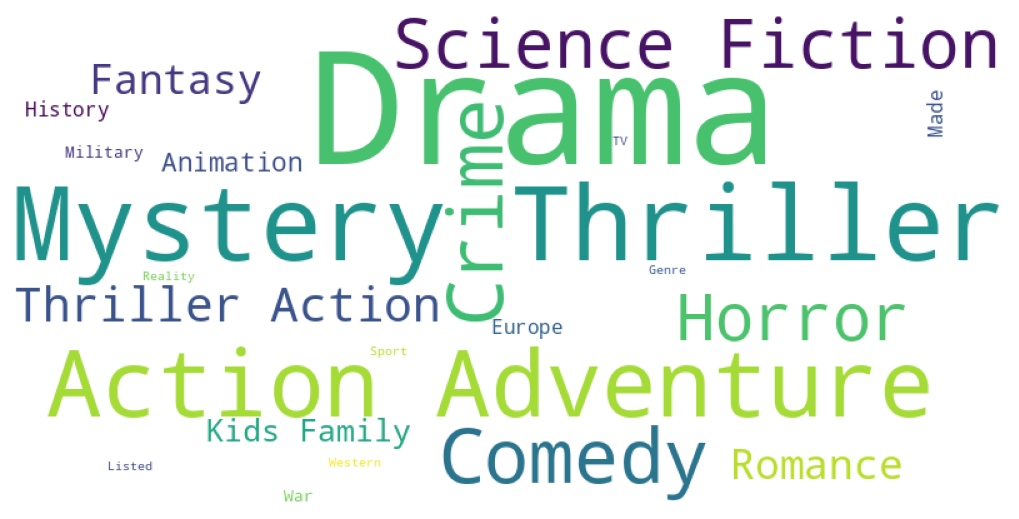

Top 5 Genres:
Genre
Drama                                                   7
Comedy, Drama                                           5
Action & Adventure, Crime, Drama, Mystery & Thriller    4
Mystery & Thriller, Action & Adventure, Drama           4
Action & Adventure, Drama                               3
Name: count, dtype: int64


In [49]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Concatenate movie and TV show genres
all_genres = pd.concat([df_movies['Genre'], df_tv_show['Genre']])

# Create a word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=STOPWORDS,
    min_font_size=10
).generate(' '.join(all_genres))

# Plot the word cloud
plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# Identify the top 5 genres
top_5_genres = all_genres.value_counts().head(5)
print("Top 5 Genres:")
print(top_5_genres)

### **Analyzing Top Genres for Movie

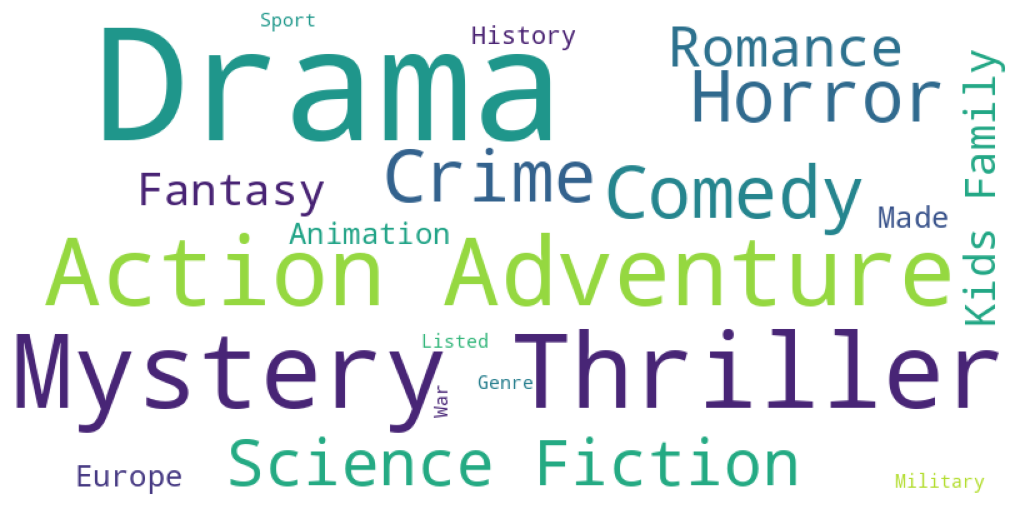

Top 5 Genres for Movies:
Genre
Drama                                                   5
Mystery & Thriller, Action & Adventure, Drama           4
Action & Adventure, Crime, Drama, Mystery & Thriller    4
Action & Adventure, Drama                               3
Drama, Mystery & Thriller, Action & Adventure           3
Name: count, dtype: int64


In [50]:
# import all required libraries
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Extract Movie Genres
movie_genres = df_movies['Genre']

# Create and display a World Cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=STOPWORDS,
    min_font_size=10
).generate(' '.join(movie_genres))

# Plot the word cloud
plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# Identify and print the top 5 Genres
top_5_movie_genres = movie_genres.value_counts().head(5)
print("Top 5 Genres for Movies:")
print(top_5_movie_genres)

### **Analyzing Top Genres for TV Show

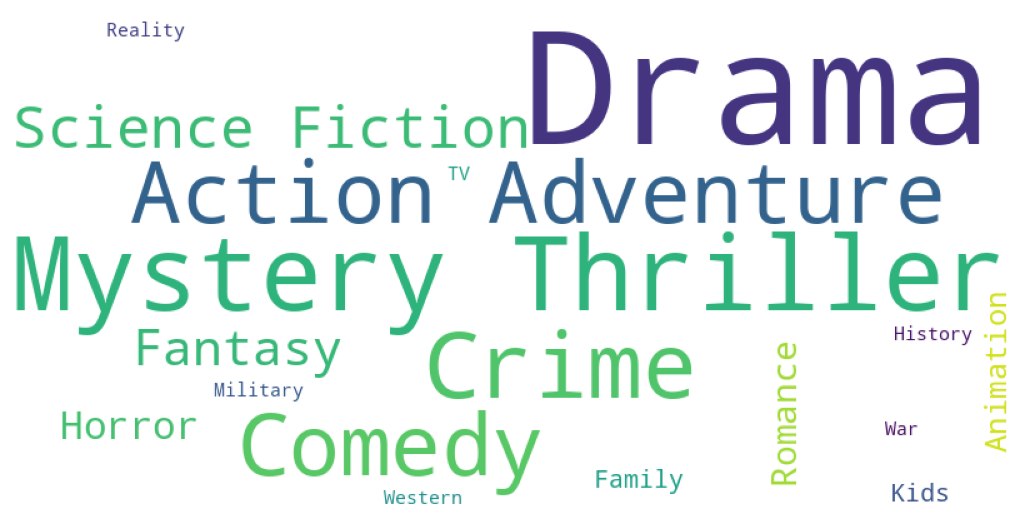

Top 5 Genres for TV Shows:
Genre
Mystery & Thriller, Science-Fiction, Drama, Horror    2
Drama                                                 2
Comedy, Drama                                         2
Drama, Crime, Mystery & Thriller                      2
Mystery & Thriller, Drama, Horror, Science-Fiction    1
Name: count, dtype: int64


In [51]:
# import all required libraries
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Extract TV show Genres
tv_show_genres = df_tv_show['Genre']

# Create and display a Word Cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=STOPWORDS,
    min_font_size=10
).generate(' '.join(tv_show_genres))

# Plot the word cloud
plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# Identify and print the top 5 genres
top_5_tv_show_genres = tv_show_genres.value_counts().head(5)
print("Top 5 Genres for TV Shows:")
print(top_5_tv_show_genres)

## **Finding Predominant Streaming Service**

In [52]:
# Write Your Code here
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Combine streaming platforms from both movies and TV shows
all_platforms = pd.concat([df_movies['Streaming Platform'], df_tv_show['Streaming Platform']])

print(all_platforms)

0     Not Available for Streaming.
1     Not Available for Streaming.
2     Not Available for Streaming.
3     Not Available for Streaming.
4     Not Available for Streaming.
                  ...             
35                       MX Player
36              Amazon Prime Video
37              Amazon Prime Video
38                      Alt Balaji
39                      Alt Balaji
Name: Streaming Platform, Length: 140, dtype: object


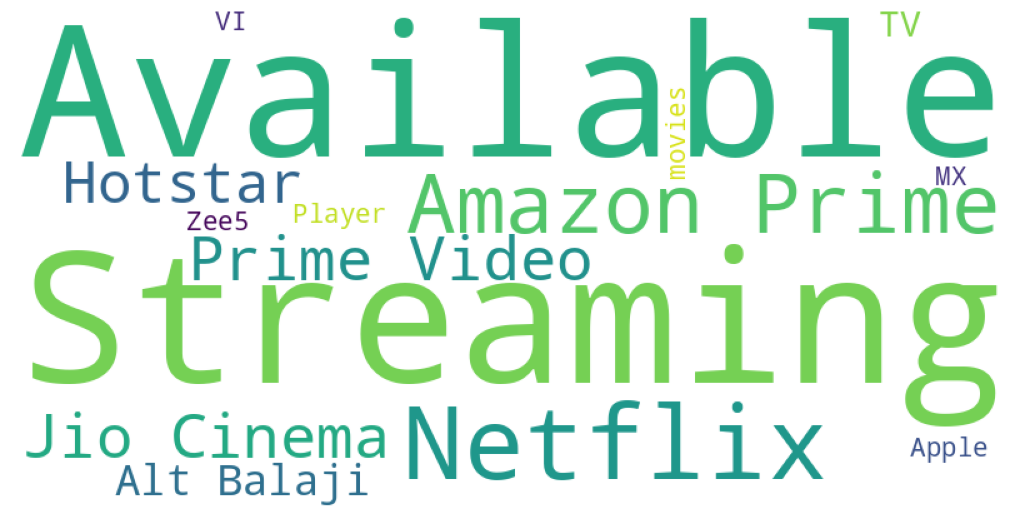

Most common streaming platform: Not Available for Streaming.


In [53]:
# Create and visualize using word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=STOPWORDS,
    min_font_size=10
).generate(' '.join(all_platforms))

# Plot the word cloud
plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# Identify the most common streaming platform
most_common_platform = all_platforms.mode()[0]
print("Most common streaming platform:", most_common_platform)


## **Task 3 :- Data Export**

In [54]:
#saving final dataframe as Final Data in csv format

# Concatenate the two DataFrame into asingle DataFrame

final_df = pd.concat([df_movies, df_tv_show])

# Save the final DataFrame to a CSV file
final_df.to_csv('Final_Data.csv', index = False)


In [55]:
#saving filter data as Filter Data in csv format
filtered_df = pd.concat([movies_after_2000, tv_shows_high_rated])

# Save the filtered DataFrame to a CSV file
filtered_df.to_csv('Filter_Data.csv', index=False)


In [56]:
final_df

,Movie Title,IMDB Rating,Release Year,Genre,Runtime/Duration,Age Rating,Production Country,Streaming Platform,Url,TV Show Title
0,BHOOL-BHULAIYAA-3,NaN,NaT,"Comedy, Horror",2h 38min,UA,India,Not Available for Streaming.,https://www.justwatch.com/in/movie/BHOOL-BHULA...,NaN
1,STREE-2,NaN,NaT,"Comedy, Horror",2h 27min,UA,India,Not Available for Streaming.,https://www.justwatch.com/in/movie/STREE-2,NaN
2,DEADPOOL-3,NaN,NaT,"Comedy, Science-Fiction, Action & Adventure",2h 8min,A,United States,Not Available for Streaming.,https://www.justwatch.com/in/movie/DEADPOOL-3,NaN
3,NTR-30,NaN,NaT,"Mystery & Thriller, Action & Adventure, Drama",2h 56min,UA,India,Not Available for Streaming.,https://www.justwatch.com/in/movie/NTR-30,NaN
4,THE-SUBSTANCE,NaN,NaT,"Science-Fiction, Drama, Horror",2h 21min,Age Rating Not Listed.,"France, United Kingdom",Not Available for Streaming.,https://www.justwatch.com/in/movie/THE-SUBSTANCE,NaN
...,...,...,...,...,...,...,...,...,...,...
35,NaN,NaN,NaT,Drama,29min,Age Rating Not Listed.,India,MX Player,https://www.justwatch.com/in/tv-show/CAMPUS-BEATS,CAMPUS-BEATS
36,NaN,0.0038,NaT,Drama,42min,Age Rating Not Listed.,"United States, Italy",Amazon Prime Video,https://www.justwatch.com/in/tv-show/CRUEL-INT...,CRUEL-INTENTIONS
37,NaN,0.0077,NaT,"Action & Adventure, Crime, Mystery & Thriller,...",57min,Age Rating Not Listed.,United States,Amazon Prime Video,https://www.justwatch.com/in/tv-show/CROSS,CROSS
38,NaN,NaN,NaT,"Crime, Mystery & Thriller, Action & Adventure,...",24min,Age Rating Not Listed.,India,Alt Balaji,https://www.justwatch.com/in/tv-show/APHARAN,APHARAN


# Project Completed!!

# **Dataset Drive Link (View Access with Anyone) -**

# ***Congratulations!!! You have completed your Assignment.***